In [30]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sb

In [31]:
df = pd.read_csv('50_Startups.csv')
df.columns
df.corr()
df
mean = df.iloc[:,3].mean()
sd = df.iloc[:,3].var()
sd =sd**.5
sd



35576.747431452364

In [32]:
for i in range(0,4): #standardization of all variables
  df.iloc[:,i] =(df.iloc[:,i]-df.iloc[:,i].mean())/(df.iloc[:,i].var())**0.5


In [33]:
print('here we can see the correlation between variables')
df.corr()



here we can see the correlation between variables


,Marketing Spend,R&D Spend,Administration,Profit
Marketing Spend,1.000000,0.669662,-0.130478,0.693929
R&D Spend,0.669662,1.000000,0.197824,0.977709
Administration,-0.130478,0.197824,1.000000,0.137055
Profit,0.693929,0.977709,0.137055,1.000000


<AxesSubplot:>

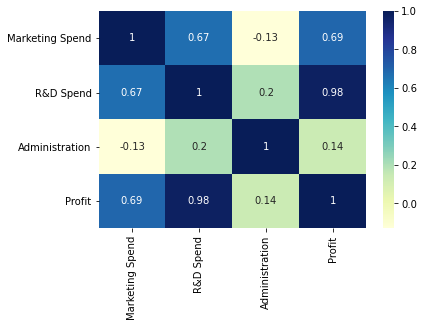

In [34]:
sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [35]:
#converting into orthogonal basis
dff = []
i = 0
while i <3:
    b = []
    b = df.iloc[:,i].values
    dff.append(b)
    i+=1
orth = dff
len(dff)
for i in range(0, len(dff)):
     
     for j in range(0 , i):
        c = [0]*47
        c = c + orth[j]*np.dot(orth[j],orth[i])/np.dot(orth[j],orth[j])#3 orthogonal vectors
        orth[i] = orth[i] - c
orth = np.array(orth)    
for i in range(0, len(orth)):
   orth[i] = orth[i]/(np.dot(orth[i],orth[i]))**0.5 # changing orthogonal vectors to unit basis vectors
da = pd.DataFrame(orth.T)
round(da.corr(),15) # correlation between orthogonal vectors



,0,1,2
0,1.0,-0.0,0.0
1,-0.0,1.0,0.0
2,0.0,0.0,1.0


In [36]:
arr = []
for i in range(0,3):
    ar = [0]*47
    for j in range(0,3):
        ar = ar + orth[i]*np.dot(orth[i],dff[j]) #arr reperesents projection of all vectors along 3 orthogonal vectors
    arr.append(ar)
arr = np.array(arr)
#print(arr)
print('projecton of 3 independent variables along 3 orthogonal vector\n')

arr = arr.T
arr #projection of all variables alnog 3 orthogonal vectors
#now we need to calculate projection of profits along 3 orthogonal basis vecotrs



projecton of 3 independent variables along 3 orthogonal vector



array([[ 2.1578,  0.5658,  0.5195],
       [ 1.9154,  0.6644,  0.9748],
       [ 1.6028,  0.662 , -0.9309],
       [ 1.3878,  0.5962, -0.2738],
       [ 1.2398,  0.6429, -1.3308],
       [ 1.211 ,  0.4256, -0.9093],
       [-0.8328,  1.8576, -0.156 ],
       [ 0.8722,  0.616 ,  0.6465],
       [ 0.7656,  0.4617,  0.8308],
       [ 0.7079,  0.5649, -0.7176],
       [ 0.0489,  0.5107, -0.7044],
       [ 0.2278,  0.3622, -1.3029],
       [ 0.2286,  0.2042,  0.0989],
       [ 0.2532,  0.1445,  0.4367],
       [ 0.2867,  0.7686,  0.9005],
       [ 0.3324,  0.6126, -0.2734],
       [ 0.3547, -0.2469,  0.136 ],
       [ 0.5132,  0.032 ,  0.8848],
       [ 0.6205, -0.1071, -0.1773],
       [-1.9429,  1.4862,  0.1258],
       [ 0.653 , -0.4873,  0.0121],
       [ 0.6624, -0.4442,  1.4736],
       [ 0.6935, -0.5667,  0.3896],
       [ 0.7061, -0.7246, -0.1599],
       [-0.7211,  0.4511, -1.1944],
       [-0.7438,  0.18  ,  0.439 ],
       [-0.7778,  0.4495,  0.4655],
       [ 1.1269, -0.9006,  0

In [37]:
profit = df.loc[:,'Profit'].values
ar =[0]*3
for i in range(0,3):
    ar[i] = np.dot(orth[i],profit)
print('projection of profits along 3 orthogonal vectors')
print(ar) 
unit_ar = ar/(np.dot(ar,ar))**0.5
np.set_printoptions(precision=4)
unit_ar


projection of profits along 3 orthogonal vectors
[4.706455967921405, 4.685030644611802, -0.27953858265285836]


array([ 0.7081,  0.7049, -0.0421])

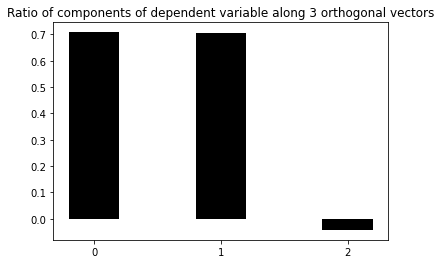

In [38]:
tick = np.arange(0,len(ar),1)
for i in range(0,len(ar)):
    plt.bar(i,unit_ar[i] , color ='black',width = .4)
    plt.xticks(tick)
    plt.title('Ratio of components of dependent variable along 3 orthogonal vectors')

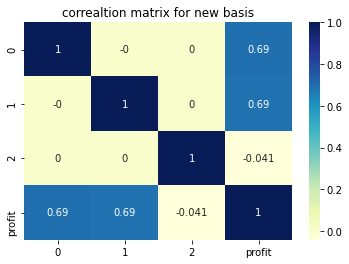

In [39]:
arr = pd.DataFrame(arr)
arr['profit'] = df.loc[:,'Profit']
sb.heatmap(round(arr.corr(),10), cmap="YlGnBu", annot=True)
plt.title('correaltion matrix for new basis')
plt.show()






In [40]:
index = np.arange(0,47,1)

In [44]:
lm_list= []
slope_list = []
slope = 0
lm = []
for i in range(0,3):
    slope = 0
    lm = []
    slope = arr.cov().loc[i,'profit']/(arr.loc[:,i].var())
    lm = arr[i].values*slope
    lm_list.append(lm)
    slope_list.append(slope)
sum = []

lm_list = np.array(lm_list)
lm_list = lm_list.T
sum = []
for i in range(0,47):
    s= 0
    for j in range(0,3):
     s = s+ lm_list[i,j]
    sum.append(s)
print("The root mean square error is \n")
print((((((sum - arr.iloc[:,3])*sd ))**2).mean())**.5 )



The root mean square error is 

7003.997741829598


In [42]:
slope_list

[0.6939290744672216, 0.93012185890246, -0.045090927350651615]